In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from allensdk.brain_observatory.behavior.behavior_session import BehaviorSession

import visual_behavior.utilities as vbu
import visual_behavior.database as db


from visual_behavior.translator.foraging2 import data_to_change_detection_core
from visual_behavior.translator.core import create_extended_dataframe

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

In [3]:
release_table = pd.read_csv('/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/visual_behavior_spring_2021_release_master_list.csv')

mouse_id = release_table.sample(random_state=5)['mouse_id'].iloc[0]
mouse_table = release_table.query('mouse_id == @mouse_id')
bsid = mouse_table[
    (mouse_table['session_type'].str.contains('TRAINING_5', na=False))
    &(~mouse_table['session_type'].str.contains('handoff', na=False))
]['behavior_session_id'].iloc[0]

## get performance df from VBA (for comparison)

In [4]:
pkl_path = db.get_pkl_path(bsid)
data = pd.read_pickle(pkl_path)
core_data = data_to_change_detection_core(data)
trial_df = create_extended_dataframe(**core_data)

In [6]:
trial_df.query('trial_type != "aborted"')

,index,lick_times,auto_rewarded,cumulative_volume,cumulative_reward_number,reward_volume,reward_times,reward_frames,rewarded,optogenetics,response_type,response_time,response_latency,change_frame,change_time,starttime,startframe,trial_length,scheduled_change_time,endtime,endframe,initial_image_category,initial_image_name,change_image_name,change_image_category,change_ori,change_contrast,initial_ori,initial_contrast,delta_ori,mouse_id,response_window,task,stage,session_duration,user_id,LDT_mode,blank_screen_timeout,stim_duration,blank_duration_range,prechange_minimum,stimulus_distribution,stimulus,distribution_mean,computer_name,behavior_session_uuid,startdatetime,date,year,month,day,hour,dayofweek,number_of_rewards,rig_id,trial_type,lick_frames,reward_licks,reward_lick_count,reward_lick_latency,reward_rate,response,color
1,1,"[306.5863357607159, 306.8364986446104, 306.953...",True,0.005,1,0.005,[306.2026309063658],[18357],True,False,HIT,[],0.533753,18348.0,306.052583,301.532072,18077,9.007545,6.0,310.539636,18617,im065,im065,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,1,B1,autorewarded,"[18380, 18395, 18402, 18411, 18420, 18429]","[0.3837048543500714, 0.6338677382445894, 0.750...",7,0.383705,inf,1.0,darkblue
5,5,"[325.2354129504529, 325.4856049680966, 325.619...",True,0.010,2,0.005,[325.03525245020865],[19486],True,False,HIT,[],0.366963,19476.0,324.868450,320.348001,19205,9.008299,6.0,329.372184,19746,im077,im077,im065,im065,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,1,B1,autorewarded,"[19498, 19513, 19521, 19529, 19538, 19547]","[0.20016050024423748, 0.45035251788794994, 0.5...",6,0.200161,inf,1.0,darkblue
7,7,"[335.89436381912674, 336.12784533709055, 336.3...",True,0.015,3,0.005,[335.54407400492346],[20116],True,False,HIT,[],0.517099,20106.0,335.377265,332.374748,19926,7.522930,4.0,339.897732,20377,im065,im065,im085,im085,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,1,B1,autorewarded,"[20137, 20151, 20164, 20172, 20179, 20187, 201...","[0.3502898142032791, 0.583771332167089, 0.8006...",13,0.350290,inf,1.0,darkblue
8,8,"[344.05120381811867, 344.16796576525667, 344.4...",True,0.020,4,0.005,[343.81764383777045],[20612],True,False,HIT,[],0.383654,20603.0,343.667550,339.897732,20377,8.290259,5.0,348.187966,20874,im085,im085,im062,im062,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,1,B1,autorewarded,"[20626, 20633, 20647, 20654, 20662, 20669, 206...","[0.23355998034821823, 0.3503219274862204, 0.58...",14,0.233560,inf,1.0,darkblue
9,9,"[353.10879652621225, 353.24219878725125, 353.3...",True,0.025,5,0.005,[352.8419281085953],[21153],True,False,HIT,[],0.417050,21144.0,352.691746,348.187966,20874,9.024333,6.0,357.212205,21415,im062,im062,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,1,B1,autorewarded,"[21169, 21177, 21185, 21192, 21199, 21208, 212...","[0.2668684176169336, 0.4002706786559429, 0.533...",16,0.266868,in

In [23]:
vba_rdf = pd.DataFrame()
for trial_limit in ['True','False']:
    vba_rdf['hit_rate_trial_limit={}'.format(trial_limit)], vba_rdf['fa_rate_trial_limit={}'.format(trial_limit)], vba_rdf['d_prime_trial_limit={}'.format(trial_limit)] = vbu.get_response_rates(
        trial_df.query('trial_type != "aborted"'),
        sliding_window=100,
        apply_trial_number_limit=trial_limit
    )
vba_rdf

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:158: RuntimeWarning: invalid value encountered in subtract
  d_prime = Z(hit_rate.fillna(0)) - Z(fa_rate.fillna(0))


,hit_rate_trial_limit=True,fa_rate_trial_limit=True,d_prime_trial_limit=True,hit_rate_trial_limit=False,fa_rate_trial_limit=False,d_prime_trial_limit=False
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,0.500000,NaN,NaN,0.500000,NaN,NaN
6,0.250000,NaN,NaN,0.250000,NaN,NaN
7,0.250000,0.500000,-0.674490,0.250000,0.500000,-0.674490
8,0.333333,0.500000,-0.430727,0.333333,0.500000,-0.430727
9,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000


In [9]:
session = BehaviorSession.from_lims(bsid)

In [10]:
session.get_performance_metrics?

In [11]:
session.get_rolling_performance_df?

In [15]:
session.trials = session.trials.merge(
    session.get_rolling_performance_df(),
    left_index=True,
    right_index=True
)

In [18]:
session.trials.query('not aborted').reset_index()

,trials_id,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time,stop_time,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name,reward_rate,hit_rate_raw,hit_rate,false_alarm_rate_raw,false_alarm_rate,rolling_dprime
0,1,"[306.5863357607159, 306.8364986446104, 306.953...",306.202631,0.005,False,False,False,True,False,False,False,True,False,301.532072,310.339480,8.807407,306.586336,18348.0,306.073733,0.512603,im065,im077,NaN,NaN,NaN,NaN,NaN,NaN
1,5,"[325.2354129504529, 325.4856049680966, 325.619...",325.035252,0.005,False,False,False,True,False,False,False,True,False,320.348001,329.172010,8.824009,325.235413,19476.0,324.889600,0.345813,im077,im065,NaN,NaN,NaN,NaN,NaN,NaN
2,7,"[335.89436381912674, 336.12784533709055, 336.3...",335.544074,0.005,False,False,False,True,False,False,False,True,False,332.374748,339.664195,7.289447,335.894364,20106.0,335.398415,0.495949,im065,im085,NaN,NaN,NaN,NaN,NaN,NaN
3,8,"[344.05120381811867, 344.16796576525667, 344.4...",343.817644,0.005,False,False,False,True,False,False,False,True,False,339.897732,347.937752,8.040019,344.051204,20603.0,343.688700,0.362504,im085,im062,NaN,NaN,NaN,NaN,NaN,NaN
4,9,"[353.10879652621225, 353.24219878725125, 353.3...",352.841928,0.005,False,False,False,True,False,False,False,True,False,348.187966,356.978756,8.790790,353.108797,21144.0,352.712896,0.395900,im062,im077,NaN,NaN,NaN,NaN,NaN,NaN
5,11,[],NaN,0.000,False,False,True,True,False,True,False,False,False,360.982034,372.058060,11.076026,NaN,22047.0,367.775570,inf,im077,im061,4.415839,0.000000,0.500000,NaN,NaN,NaN
6,12,[],NaN,0.000,False,False,True,True,False,True,False,False,False,372.274884,381.816218,9.541334,NaN,22633.0,377.550460,inf,im061,im062,4.239845,0.000000,0.250000,NaN,NaN,NaN
7,13,[],NaN,0.000,False,False,False,False,False,False,True,False,True,382.033031,390.840453,8.807422,NaN,23174.0,386.574647,inf,im062,im062,4.445879,0.000000,0.250000,0.0,0.500000,-0.674490
8,14,"[395.2942001406336, 395.4276374945475, 395.794...",395.294200,0.007,True,False,False,True,False,True,False,False,False,391.074023,399.097391,8.023368,395.294200,23670.0,394.848258,0.445942,im062,im066,4.558266,0.333333,0.333333,0.0,0.500000,-0.430727
9,15,"[402.78381066268776, 402.9172582796018, 403.26...",402.783811,0.007,True,False,False,True,False,True,False,False,False,399.347593,406.687088,7.339495,402.783811,24123.0,402.404593,0.379218,im066,im063,4.404163,0.500000,0.500000,0.0,0.500000,0.000000


<IPython.core.display.Javascript object>


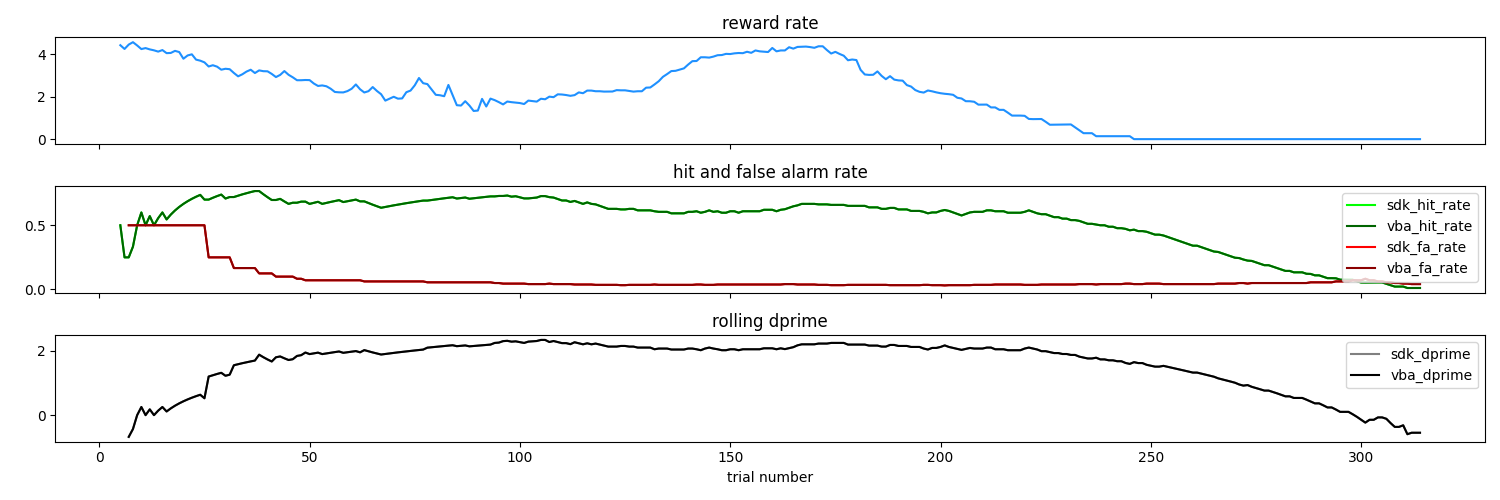

In [25]:
def make_vba_sdk_comparison_plot()
fig, ax = plt.subplots(3,1,figsize = (15,5), sharex=True)

ax[0].plot(
    session.trials.query('not aborted').reset_index()['reward_rate'],
    color='dodgerblue'
)

ax[0].set_title('reward rate')


ax[1].plot(
    session.trials.query('not aborted').reset_index()['hit_rate'],
    color='lime'
)


ax[1].plot(
    vba_rdf['hit_rate_trial_limit=False'],
    color='darkgreen'
)


ax[1].plot(
    session.trials.query('not aborted').reset_index()['false_alarm_rate'],
    color='red'
)

ax[1].plot(
    vba_rdf['fa_rate_trial_limit=True'],
    color='darkred'
)


ax[1].legend(['sdk_hit_rate','vba_hit_rate', 'sdk_fa_rate','vba_fa_rate'],loc='upper right')

ax[1].set_title('hit and false alarm rate')

ax[2].plot(
    session.trials.query('not aborted').reset_index()['rolling_dprime'],
    color='gray'
)

ax[2].plot(
    vba_rdf['d_prime_trial_limit=False'],
    color='black'
)


ax[2].legend(['sdk_dprime','vba_dprime',],loc='upper right')

ax[2].set_title('rolling dprime')
ax[2].set_xlabel('trial number')

fig.tight_layout()

In [10]:
trial_df

,index,lick_times,auto_rewarded,cumulative_volume,cumulative_reward_number,reward_volume,reward_times,reward_frames,rewarded,optogenetics,response_type,response_time,response_latency,change_frame,change_time,starttime,startframe,trial_length,scheduled_change_time,endtime,endframe,initial_image_category,initial_image_name,change_image_name,change_image_category,change_ori,change_contrast,initial_ori,initial_contrast,delta_ori,mouse_id,response_window,task,stage,session_duration,user_id,LDT_mode,blank_screen_timeout,stim_duration,blank_duration_range,prechange_minimum,stimulus_distribution,stimulus,distribution_mean,computer_name,behavior_session_uuid,startdatetime,date,year,month,day,hour,dayofweek,number_of_rewards,rig_id,trial_type,lick_frames,reward_licks,reward_lick_count,reward_lick_latency,reward_rate,response,color
0,0,"[300.6146060526662, 300.74810332932975]",True,0.000,0,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,299.997434,17985,1.534651,6.0,301.532072,18077,im065,im065,im065,im065,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,"[18022, 18030]",[],0,NaN,inf,0.0,lightgray
1,1,"[306.5863357607159, 306.8364986446104, 306.953...",True,0.005,1,0.005,[306.2026309063658],[18357],True,False,HIT,[],0.533753,18348.0,306.052583,301.532072,18077,9.007545,6.0,310.539636,18617,im065,im065,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,1,B1,autorewarded,"[18380, 18395, 18402, 18411, 18420, 18429]","[0.3837048543500714, 0.6338677382445894, 0.750...",7,0.383705,inf,1.0,darkblue
2,2,[310.60636154402164],True,0.005,1,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,310.539636,18617,0.750564,6.0,311.290270,18662,im077,im077,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,[18621],[],0,NaN,inf,0.0,lightgray
3,3,[315.7608013226709],True,0.005,1,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,311.290270,18662,5.287956,6.0,316.578183,18979,im077,im077,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,[18930],[],0,NaN,inf,0.0,lightgray
4,4,[320.0309995908174],True,0.005,1,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,316.578183,18979,3.770061,6.0,320.348001,19205,im077,im077,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,[19186],[],0,NaN,inf,0.0,lightgray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,515,[],None,0.851,123,0.000,[],[],False,False,CR,[],inf,231476.0,3861.201002,3858.181844,231295,7.539696,4.0,3865.721487,231747,im063,im063,im063,im063,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-46

In [11]:
from visual_behavior.translator.core import annotate

In [12]:
annotate.calculate_reward_rate(trial_df)

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


,index,lick_times,auto_rewarded,cumulative_volume,cumulative_reward_number,reward_volume,reward_times,reward_frames,rewarded,optogenetics,response_type,response_time,response_latency,change_frame,change_time,starttime,startframe,trial_length,scheduled_change_time,endtime,endframe,initial_image_category,initial_image_name,change_image_name,change_image_category,change_ori,change_contrast,initial_ori,initial_contrast,delta_ori,mouse_id,response_window,task,stage,session_duration,user_id,LDT_mode,blank_screen_timeout,stim_duration,blank_duration_range,prechange_minimum,stimulus_distribution,stimulus,distribution_mean,computer_name,behavior_session_uuid,startdatetime,date,year,month,day,hour,dayofweek,number_of_rewards,rig_id,trial_type,lick_frames,reward_licks,reward_lick_count,reward_lick_latency,reward_rate,response,color
0,0,"[300.6146060526662, 300.74810332932975]",True,0.000,0,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,299.997434,17985,1.534651,6.0,301.532072,18077,im065,im065,im065,im065,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,"[18022, 18030]",[],0,NaN,inf,0.0,lightgray
1,1,"[306.5863357607159, 306.8364986446104, 306.953...",True,0.005,1,0.005,[306.2026309063658],[18357],True,False,HIT,[],0.533753,18348.0,306.052583,301.532072,18077,9.007545,6.0,310.539636,18617,im065,im065,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,1,B1,autorewarded,"[18380, 18395, 18402, 18411, 18420, 18429]","[0.3837048543500714, 0.6338677382445894, 0.750...",7,0.383705,inf,1.0,darkblue
2,2,[310.60636154402164],True,0.005,1,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,310.539636,18617,0.750564,6.0,311.290270,18662,im077,im077,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,[18621],[],0,NaN,inf,0.0,lightgray
3,3,[315.7608013226709],True,0.005,1,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,311.290270,18662,5.287956,6.0,316.578183,18979,im077,im077,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,[18930],[],0,NaN,inf,0.0,lightgray
4,4,[320.0309995908174],True,0.005,1,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,316.578183,18979,3.770061,6.0,320.348001,19205,im077,im077,im077,im077,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-460d-4b55-a9c6-1cb31fc02a77,2019-06-19 09:37:10.989000-07:00,2019-06-19,2019,6,19,9,2,0,B1,aborted,[19186],[],0,NaN,inf,0.0,lightgray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,515,[],None,0.851,123,0.000,[],[],False,False,CR,[],inf,231476.0,3861.201002,3858.181844,231295,7.539696,4.0,3865.721487,231747,im063,im063,im063,im063,None,None,None,None,None,453989,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4500.637603,sophiel,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,W7VS-SYSLOGIC7,e0ed81f9-46